In [16]:
mykey = 'EqG0BK75sngBdgYr91DVtqGkGyipmBHE'
heading = 60
panoid = '09024300011703080952555069S'

In [17]:
baiduurl = 'http://api.map.baidu.com/panorama/v2?ak={0}&width=320&height=320&heading={1}&panoid={2}&fov=90'.format(mykey,heading,panoid)
#baiduurl = 'http://api.map.baidu.com/panorama/v2?ak=EqG0BK75sngBdgYr91DVtqGkGyipmBHE&panoid=09024300011703161616045369S&width=320&height=320&heading=60&fov=90'

In [18]:
import requests
r = requests.get(baiduurl)
with open("baidu_street/mykey.png", "wb") as code:
    code.write(r.content)


In [19]:


import cv2

imgName = "test.jpg";
kernel_size = (5, 5);
sigma = 1.5;

img = cv2.imread(imgName);
img = cv2.GaussianBlur(img, kernel_size, sigma);
new_imgName = "New_" + str(kernel_size[0]) + "_" + str(sigma) + "_" + imgName;
cv2.imwrite(new_imgName, img);

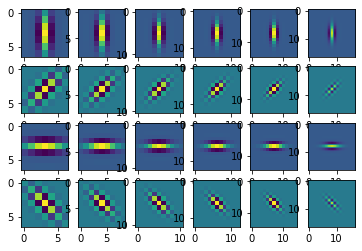

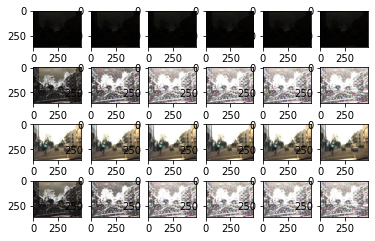

In [1]:
import cv2,os
import numpy as np
import matplotlib.pyplot as plt


def get_img(input_Path):
    img_paths = []
    for (path, dirs, files) in os.walk(input_Path):
        for filename in files:
            if filename.endswith(('.jpg','.png')):
                img_paths.append(path+'/'+filename)
    return img_paths


#构建Gabor滤波器
def build_filters():
     filters = []
     ksize = [7,9,11,13,15,17] # gabor尺度，6个
     lamda = np.pi/2.0         # 波长
     for theta in np.arange(0, np.pi, np.pi / 4): #gabor方向，0°，45°，90°，135°，共四个
         for K in range(6):
             kern = cv2.getGaborKernel((ksize[K], ksize[K]), 1.0, theta, lamda, 0.5, 0, ktype=cv2.CV_32F)
             kern /= 1.5*kern.sum()
             filters.append(kern)
     plt.figure(1)

     #用于绘制滤波器
     for temp in range(len(filters)):
         plt.subplot(4, 6, temp + 1)
         plt.imshow(filters[temp])
     plt.show()
     return filters

#Gabor特征提取
def getGabor(img,filters):
    res = [] #滤波结果
    for i in range(len(filters)):
        # res1 = process(img, filters[i])
        accum = np.zeros_like(img)
        for kern in filters[i]:
            fimg = cv2.filter2D(img, cv2.CV_8UC1, kern)
            accum = np.maximum(accum, fimg, accum)
        res.append(np.asarray(accum))

    #用于绘制滤波效果
    plt.figure(2)
    for temp in range(len(res)):
        plt.subplot(4,6,temp+1)
        plt.imshow(res[temp], cmap='gray' )
    plt.show()
    return res  #返回滤波结果,结果为24幅图，按照gabor角度排列


if __name__ == '__main__':
    input_Path = './test_jpg'
    filters = build_filters()
    img_paths = get_img(input_Path)
    for img in img_paths:
        img = cv2.imread(img)
        res = getGabor(img, filters)





In [2]:
len(res)

24

In [3]:
index = 0
for each in res:
    cv2.imshow("Image", each) 
    cv2.waitKey (0)
    #cv2.imwrite('./test_jpg/%d'%index,each,[int(cv2.IMWRITE_JPEG_QUALITY),95])

In [10]:
import numpy as np
import math

In [14]:
def cal(xy1, xy2):
    return math.pow((xy1[0] - xy2[0]),2) + math.pow(abs(xy1[1] - xy2[1]),2)

In [15]:
d=np.zeros((320,320))

In [34]:
mid = (160,160)
sigma = 100000

In [35]:
for i in range(320):
    for j in range(320):
        d[i][j] = math.exp(-(cal(mid,(i,j)))/sigma)

In [36]:
d

array([[0.59929579, 0.60121059, 0.60311946, ..., 0.60502228, 0.60311946,
        0.60121059],
       [0.60121059, 0.60313152, 0.60504648, ..., 0.60695538, 0.60504648,
        0.60313152],
       [0.60311946, 0.60504648, 0.60696752, ..., 0.60888248, 0.60696752,
        0.60504648],
       ...,
       [0.60502228, 0.60695538, 0.60888248, ..., 0.61080349, 0.60888248,
        0.60695538],
       [0.60311946, 0.60504648, 0.60696752, ..., 0.60888248, 0.60696752,
        0.60504648],
       [0.60121059, 0.60313152, 0.60504648, ..., 0.60695538, 0.60504648,
        0.60313152]])

In [37]:
d[160][160]

1.0

In [23]:
mid

(160, 160)

In [25]:
cal(mid,(i,j))

50562.0

In [33]:
math.exp(-(cal(mid,(i,j)))/(100000))

0.603131517940079

In [38]:
import matplotlib.pyplot as plt


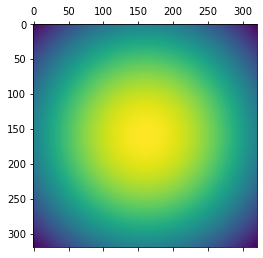

In [39]:
plt.matshow(d)